In [1]:
# Install this module whenever libnirs isn't 
#%pip install --user -U git+https://github.com/jdtatz/libnirs.git

In [2]:
import numpy as np
from libnirs import *
import pandas as pd
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib import colors
from matplotlib import rc
from matplotlib import rcParams
from decimal import Decimal

latex_path = '/usr/local/texlive/2023/bin/universal-darwin'

rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}\usepackage{{amsfonts}}\usepackage{{amssymb}}'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'



In [3]:
#Run this just on local 
%env PATH=/Library/TeX/texbin:$PATH

env: PATH=/Library/TeX/texbin:$PATH


In [4]:
file_names = ['Only_LRF_IVH','Only_LRF_Preterm']
keys=['IVH','PBI']

In [5]:
wavelengths = ['673','686','701','724','754','784','814','827','852']
population_dataframes_dict={}
for name, key in zip(file_names, keys): 
    population_dataframes_dict[key] = pd.read_excel(name+'.xlsx')
    organized_df = pd.DataFrame()
    
    for w in wavelengths: 
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]

        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
                
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]
        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
    
    organized_df = organized_df.dropna()
    
    population_dataframes_dict[key] = organized_df

In [7]:

def create_dictionary_µs_d(dictionary_of_data_frames,wvls, distances, return_min_and_max_µ):
    n= 1.4; n_ext = 1;
    stat_dict_µs={}; stat_dict_dr ={}; µus_dict = {}; diff_ref_dict ={}; min_value_µa = 10000; min_value_µsp = 1000; max_value_µa = 0; max_value_µsp = 0; 
    min_value_dr =1000; max_value_dr = 0;

    for key in list(dictionary_of_data_frames.keys()):
        µsp_dict = {}; µa_dict = {}; µ_categories={}; µsp_stat_dict = {}; µa_stat_dict={};  stat_categories={}; dr_distance_dict = {}; dr_distance_stats ={};

        for d in distances: 
            dif_ref_wl_dict = {}; dr_wl_stats = {};
            for w in wvls:
                dif_ref = []
                dif_ref_stat_array = []; µsp_stat_array = []; µa_stat_array=[]; 
                µsp_dict[w] = np.asarray(dictionary_of_data_frames[key]['µsp_'+w])
                µa_dict[w] = np.asarray(dictionary_of_data_frames[key]['µa_'+w])    

            
                for µ_a, µ_sp in zip(µa_dict[w], µsp_dict[w]):
                    dr = model_ss(d, µ_a, µ_sp, n, n_ext)
                    dif_ref = np.append(dif_ref,dr/(2*np.pi))

                dif_ref_wl_dict[w] = dif_ref
                diff_ref_min =  '%.2E' % Decimal (min(dif_ref_wl_dict[w])); diff_ref_min = diff_ref_min[0:4] + ' E-'+diff_ref_min[-1]
                dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_min)
                diff_ref_max =  '%.2E' % Decimal (max(dif_ref_wl_dict[w])); diff_ref_max = diff_ref_max[0:4] + ' E-'+diff_ref_max[-1]
                dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_max)
                
                diff_ref_1_p =  '%.2E' % Decimal (np.percentile(dif_ref_wl_dict[w],1)); diff_ref_1_p = diff_ref_1_p[0:4] + ' E-'+diff_ref_1_p[-1]
                dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_1_p)

                diff_ref_5_p =  '%.2E' % Decimal (np.percentile(dif_ref_wl_dict[w],5)); diff_ref_5_p = diff_ref_5_p[0:4] + ' E-'+diff_ref_5_p[-1]
                dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_5_p)

                diff_ref_95_p =  '%.2E' % Decimal (np.percentile(dif_ref_wl_dict[w],95)); diff_ref_95_p = diff_ref_95_p[0:4] + ' E-'+diff_ref_95_p[-1]
                dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_95_p)
                diff_ref_99_p =  '%.2E' % Decimal (np.percentile(dif_ref_wl_dict[w],99)); diff_ref_99_p = diff_ref_99_p[0:4] + ' E-'+diff_ref_99_p[-1]
                dif_ref_stat_array = np.append(dif_ref_stat_array, diff_ref_99_p)

                dr_wl_stats[w] = dif_ref_stat_array

                if min(dif_ref_wl_dict[w]) < min_value_dr:
                    min_value_dr = min(dif_ref_wl_dict[w])
                if max(dif_ref_wl_dict[w]) > max_value_dr:
                    max_value_dr = max(dif_ref_wl_dict[w])


                if d == distances[0]:
                    µsp_stat_array =  np.append(µsp_stat_array,min(µsp_dict[w])); µsp_stat_array =  np.append(µsp_stat_array,max(µsp_dict[w]))
                    µsp_stat_array =  np.append(µsp_stat_array,np.percentile(µsp_dict[w], 95)); µsp_stat_array =  np.append(µsp_stat_array,np.percentile(µsp_dict[w], 99))
                    µsp_stat_dict[w] = µsp_stat_array
                    
                    µa_stat_array =  np.append(µa_stat_array,min(µa_dict[w])); µa_stat_array =  np.append(µa_stat_array,max(µa_dict[w]))
                    µa_stat_array =  np.append(µa_stat_array, np.percentile(µa_dict[w], 95)); µa_stat_array =  np.append(µa_stat_array,np.percentile(µa_dict[w], 99))
                    µa_stat_dict[w] = µa_stat_array


                    if max(µsp_dict[w]) > max_value_µsp: 
                        max_value_µsp = max(µsp_dict[w])
                    if max(µa_dict[w]) > max_value_µa: 
                        max_value_µa = max(µa_dict[w])

                    if min(µsp_dict[w]) < min_value_µsp: 
                        min_value_µsp = min(µsp_dict[w])
                    if min(µa_dict[w]) < min_value_µa: 
                        min_value_µa = min(µa_dict[w])

            dr_distance_dict[str(d)+'_cm'] = dif_ref_wl_dict
            dr_distance_stats[str(d)+'_cm'] = dr_wl_stats


        diff_ref_dict[key] = dr_distance_dict
        stat_dict_dr[key] = dr_distance_stats
        stat_categories['µsp_stats'] = µsp_stat_dict; stat_categories['µa_stats'] = µa_stat_dict
        µ_categories['µsp_dict']= µsp_dict ; µ_categories['µa_dict']= µa_dict 
        µus_dict[key] =  µ_categories
        stat_dict_µs[key] =  stat_categories
    min_values_µs = np.asarray([min_value_µa, min_value_µsp])
    max_values_µs = np.asarray([max_value_µa, max_value_µsp])

    #stat_dict returns the values of min, max, 1, 5, 95, and 99 percentile in that order
    if return_min_and_max_µ: 
        return µus_dict, diff_ref_dict, stat_dict_dr, min_value_dr, max_value_dr, min_values_µs, max_values_µs, stat_dict_µs
        
    else: 
        return µus_dict, diff_ref_dict, stat_dict_dr, min_value_dr, max_value_dr

    


In [34]:
µs_values_dict_d, diff_ref_dict_d, stat_dict_dr_d, min_value_dr_d, max_value_dr_d  = create_dictionary_µs_d(population_dataframes_dict,wavelengths,[1.5,2,2.5,3],False)

In [36]:
dr_df = pd.DataFrame(columns=['Population','Distance (cm)', 'Wavelength (nm)', 'Min_DR (per Str)', 'Max_DR (per Str)', 
                              '1 %ile (DR per Str)', '5 %ile (DR per Str)', '95 %ile (DR per Str)', '99 %ile (DR per Str)'])

for population in stat_dict_dr_d.keys(): 
    for distance in stat_dict_dr_d[population].keys():
        for wavelength in stat_dict_dr_d[population][distance].keys():
            stat_values = stat_dict_dr_d[population][distance][wavelength]
            dr_df.loc[len(dr_df.index)] = [population, distance, wavelength,stat_values[0],stat_values[1],stat_values[2],stat_values[3],stat_values[4],stat_values[5]] 

dr_df

,Population,Distance (cm),Wavelength (nm),Min_DR (per Str),Max_DR (per Str),1 %ile (DR per Str),5 %ile (DR per Str),95 %ile (DR per Str),99 %ile (DR per Str)
0,IVH,1.5_cm,673,1.08 E-4,2.59 E-3,1.55 E-4,2.22 E-4,1.40 E-3,1.67 E-3
1,IVH,1.5_cm,686,1.64 E-4,2.63 E-3,2.15 E-4,2.72 E-4,1.60 E-3,1.97 E-3
2,IVH,1.5_cm,701,2.19 E-4,2.69 E-3,2.71 E-4,3.36 E-4,1.74 E-3,2.14 E-3
3,IVH,1.5_cm,724,2.87 E-4,2.74 E-3,3.11 E-4,3.90 E-4,1.86 E-3,2.17 E-3
4,IVH,1.5_cm,754,2.25 E-4,2.63 E-3,2.92 E-4,3.55 E-4,1.67 E-3,1.99 E-3
...,...,...,...,...,...,...,...,...,...
67,PBI,3_cm,754,1.80 E-6,6.00 E-4,2.67 E-6,4.26 E-6,3.28 E-5,7.52 E-5
68,PBI,3_cm,784,2.32 E-6,6.17 E-4,3.71 E-6,6.25 E-6,4.54 E-5,9.99 E-5
69,PBI,3_cm,814,2.96 E-6,5.73 E-4,3.23 E-6,6.02 E-6,4.87 E-5,1.13 E-4
70,PBI,3_cm,827,2.38 E-6,5.68 E-4,3.47 E-6,6.02 E-6,4.75 E-5,1.09 E-4


In [37]:
dr_df.to_csv('Min_Max_Percentiles_DR')

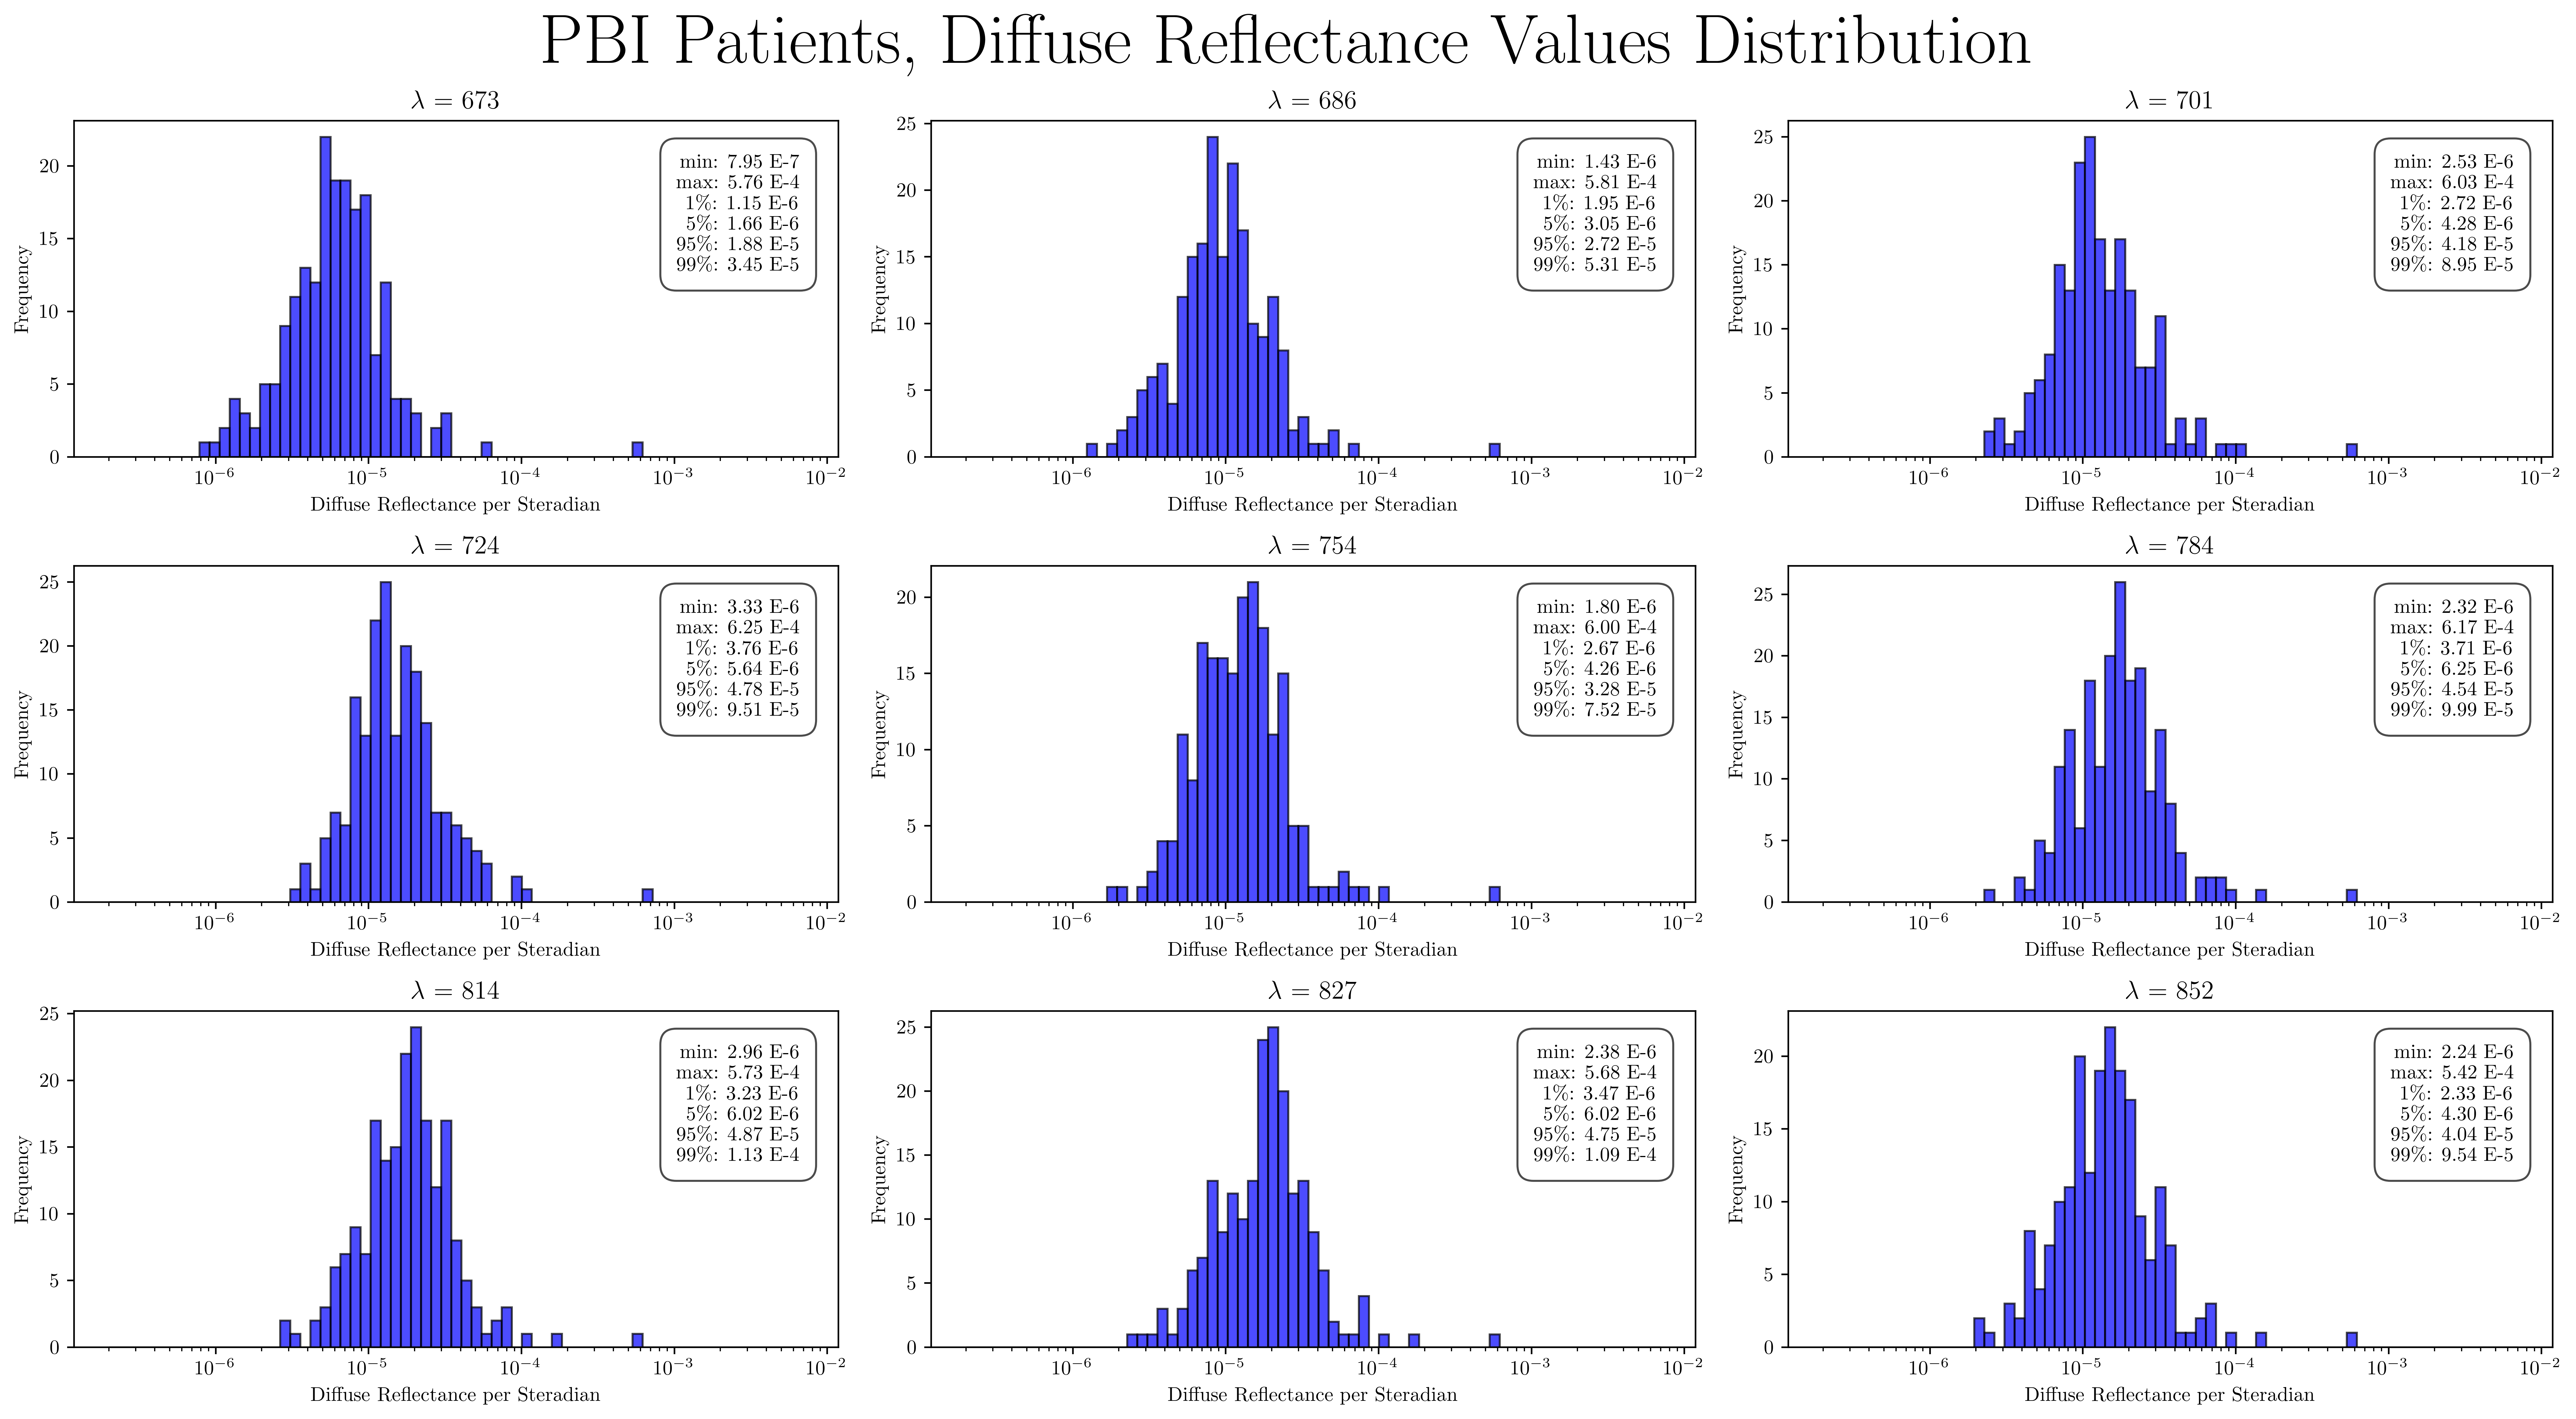

In [37]:

patients = 'PBI'
dr_dict_p = diff_ref_dict_[patients]
stat_dict_dr_p = stat_dict_dr_[patients]
log_bins = np.logspace(np.log10(0.0000002), np.log10(0.007), 70)

fig, axs = plt.subplots(3, 3, figsize=(18, 10), dpi=500)
axs = axs.flatten()

for wv in range(len(wavelengths)):
    stat_array = stat_dict_dr_p[wavelengths[wv]]
    axs[wv].hist(dr_dict_p[wavelengths[wv]], bins=log_bins, color='blue', edgecolor='black', alpha=0.7)
    axs[wv].set_xlabel(fr'Diffuse Reflectance per Steradian')
    axs[wv].set_xscale('log')
    axs[wv].set_ylabel(r"Frequency")
    axs[wv].set_title(fr"$\lambda$ =  {wavelengths[wv]}",fontsize = 13)

    # Add personalized text in the upper right corner
    # Add personalized text in the upper right corner
# Add personalized text in the upper right corner
    text = f"min: {stat_array[0]}\nmax: {stat_array[1]}\n1\%: {stat_array[2]}\n5\%: {stat_array[3]}\n95\%: {stat_array[4]}\n99\%: {stat_array[5]}"
    axs[wv].text(0.95, 0.9, text, transform=axs[wv].transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.8'))




fig.suptitle(fr"{patients} Patients, Diffuse Reflectance Values Distribution", fontsize=35, fontweight='bold')

plt.tight_layout()
plt.savefig('Diffuse_Reflectance_Histogram_'+str(patients)+'.jpg', dpi=500)
# plt.show()
